In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import nltk
import matplotlib.pyplot as plt

plt.style.use("ggplot")

In [ ]:
df = pd.read_csv(r"E:\Reviews.csv")
#df.shape
df = df.head(500)
df.shape

(500, 10)

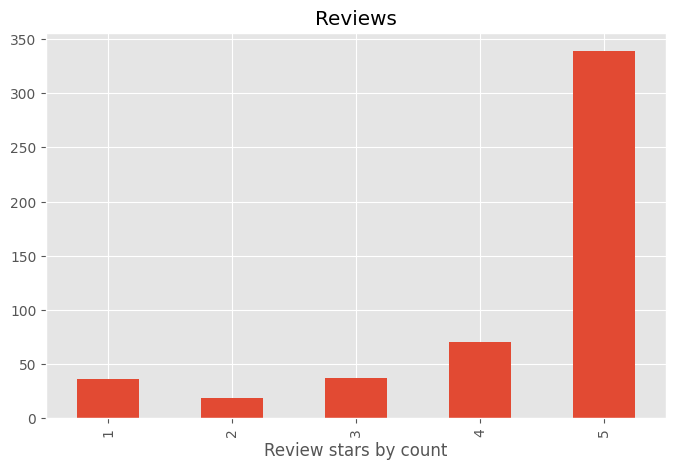

In [ ]:
ax = df['Score'].value_counts().sort_index().plot(kind= 'bar', title= "Reviews", figsize= (8,5))
plt.xlabel('Review stars by count')
plt.show()


In [ ]:
example = df['Text'][50]
tokens = nltk.word_tokenize(example)
tagged = nltk.pos_tag(tokens)
tagged[:10]
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [ ]:
from tqdm.notebook import tqdm
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')
vaders.head()

In [ ]:
import seaborn as sns
sampled_data = vaders.sample(10, random_state=42)  # try 500 if it's still too much
ax = sns.barplot(data=sampled_data, x='Score', y='compound')



In [ ]:
'''ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()
fig, axs = plt.subplots(1, 3, figsize=(12, 3))'''
